In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt



In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy as sq
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy.orm import sessionmaker
from sqlalchemy import select

In [6]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
connection = engine.connect()
metadata = sq.MetaData()
measurement = sq.Table('measurement', metadata, autoload=True, autoload_with=engine)
station=sq.Table('station', metadata, autoload=True,autoload_with= engine)

In [10]:
print(measurement.columns.keys())

['id', 'station', 'date', 'prcp', 'tobs']


In [11]:
print(measurement.columns.values())

[Column('id', INTEGER(), table=<measurement>, primary_key=True, nullable=False), Column('station', TEXT(), table=<measurement>), Column('date', TEXT(), table=<measurement>), Column('prcp', FLOAT(), table=<measurement>), Column('tobs', FLOAT(), table=<measurement>)]


In [12]:
print(station.columns.keys())

['id', 'station', 'name', 'latitude', 'longitude', 'elevation']


In [47]:
#Get all the values in columns.
#Equivalent to 'SELECT * FROM measurement'
query = sq.select([measurement])
resultproxy =connection.execute(query)
resultset = resultproxy.fetchall()
resultset[:5]

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [45]:
query = sq.select([station])
resultproxy =connection.execute(query)
s_resultset = resultproxy.fetchall()
s_resultset

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [82]:
#Convert Measurement table into datframe.
measurement_df=pd.DataFrame(resultset, columns =['id', 'station', 'date', 'prcp', 'tobs'])
measurement_df.head(20)


,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0
5,6,USC00519397,2010-01-07,0.06,70.0
6,7,USC00519397,2010-01-08,0.00,64.0
7,8,USC00519397,2010-01-09,0.00,68.0
8,9,USC00519397,2010-01-10,0.00,73.0
9,10,USC00519397,2010-01-11,0.01,64.0


In [106]:
measurement_df.to_csv( 'measurement_df.csv',index=False)

#count the days when prcp recording is Nan.

#count the days when prcp recording is zero
# count = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()

#count the days when prcp recording is more than zero



In [51]:
#Convert Station table into datframe.
station_df=pd.DataFrame(s_resultset, columns =['id', 'station', 'name', 'latitude', 'longitude', 'elevation'])
station_df

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [18]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [19]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

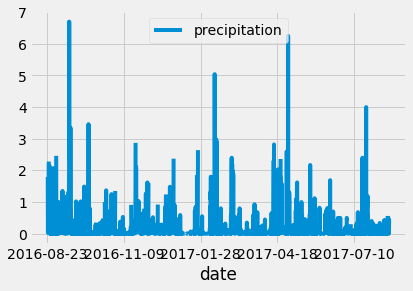

In [56]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the last data point in the database. 
# prev_year = dt.date(2017, 8, 23)

# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
# results = []
# results = session.query(Measurement.date, Measurement.prcp)
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()
# print(results)
# print(results.all())

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date','precipitation'])
df.set_index(df['date'], inplace=True)

# Sort the dataframe by date
df = df.sort_index()
# print(df.to_string(index=False))
# Use Pandas Plotting with Matplotlib to plot the data
df.plot()

In [57]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()


,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [22]:
# How many stations are available in this dataset?
session.query(func.count(Station.station)).all()

[(9)]

In [23]:
# What are the most active stations?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [24]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

In [25]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station. 
results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= prev_year).all()
print(results)


[(77.0,), (77.0,), (80.0,), (80.0,), (75.0,), (73.0,), (78.0,), (77.0,), (78.0,), (80.0,), (80.0,), (78.0,), (78.0,), (78.0,), (73.0,), (74.0,), (80.0,), (79.0,), (77.0,), (80.0,), (76.0,), (79.0,), (75.0,), (79.0,), (78.0,), (79.0,), (78.0,), (78.0,), (76.0,), (74.0,), (77.0,), (78.0,), (79.0,), (79.0,), (77.0,), (80.0,), (78.0,), (78.0,), (78.0,), (77.0,), (79.0,), (79.0,), (79.0,), (79.0,), (75.0,), (76.0,), (73.0,), (72.0,), (71.0,), (77.0,), (79.0,), (78.0,), (79.0,), (77.0,), (79.0,), (77.0,), (78.0,), (78.0,), (78.0,), (78.0,), (77.0,), (74.0,), (75.0,), (76.0,), (73.0,), (76.0,), (74.0,), (77.0,), (76.0,), (76.0,), (74.0,), (75.0,), (75.0,), (75.0,), (75.0,), (71.0,), (63.0,), (70.0,), (68.0,), (67.0,), (77.0,), (74.0,), (77.0,), (76.0,), (76.0,), (75.0,), (76.0,), (75.0,), (73.0,), (75.0,), (73.0,), (75.0,), (74.0,), (75.0,), (74.0,), (75.0,), (73.0,), (75.0,), (73.0,), (73.0,), (74.0,), (70.0,), (72.0,), (70.0,), (67.0,), (67.0,), (69.0,), (70.0,), (68.0,), (69.0,), (69.0,), 

In [26]:
df = pd.DataFrame(results, columns=['tobs'])
df.head()

,tobs
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0


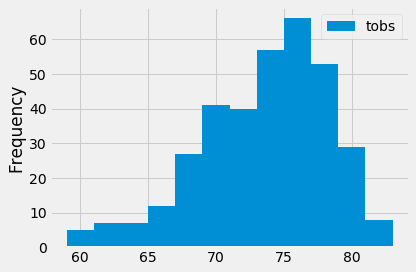

In [27]:
# plot the results as a histogram
df.plot.hist(bins=12)
plt.tight_layout()


## Skill Drill

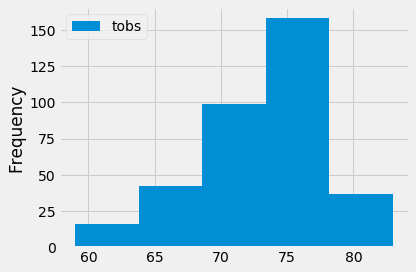

In [28]:
# plot the results as a histogram
df.plot.hist(bins=5)
plt.tight_layout()


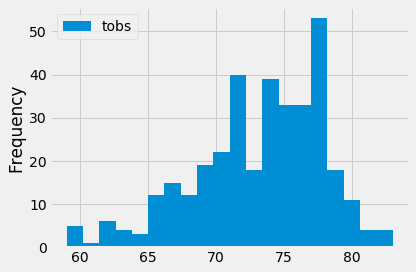

In [29]:
# plot the results as a histogram
df.plot.hist(bins=20)
plt.tight_layout()


In [170]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start='%Y-%m-%d', end='%Y-%m-%d'):
    temps=session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.date >= start).\
    filter(Measurement.date<= end).all()
    return temps 
    
calc_temps('2010-01-01', '2017-12-30')

[(53.0, 87.0, 73.09795396419437)]

In [171]:
# Write a function called `calc_prcp` that will accept start date and end date in the format '%Y-%m-%d' 


def calc_prcp(year, start='%Y-%m-%d', end='%Y-%m-%d'):
    prcip=session.query(func.Count(Measurement.prcp)).\
    filter(Measurement.date >= start).\
    filter(Measurement.date<= end).all()
    return prcip
    
calc_prcp(2010,'20010-06-01', '2010-06-31')


[(1264)]

In [32]:
Session = sessionmaker(bind=engine)
session = Session()
measurement_table = select('*').select_from(Measurement)
measurement_result = session.execute(measurement_table).fetchall()
print(Measurement.__table__.columns.keys())
print(measurement_result[:5])

['id', 'station', 'date', 'prcp', 'tobs']
[(1, 'USC00519397', '2010-01-01', 0.08, 65.0), (2, 'USC00519397', '2010-01-02', 0.0, 63.0), (3, 'USC00519397', '2010-01-03', 0.0, 74.0), (4, 'USC00519397', '2010-01-04', 0.0, 76.0), (5, 'USC00519397', '2010-01-06', None, 73.0)]


In [33]:
Session = sessionmaker(bind=engine)
session = Session()
stations_table = select('*').select_from(Station)
stations_result = session.execute(stations_table).fetchall()
print(Station.__table__.columns.keys())
print(stations_result[:5])

['id', 'station', 'name', 'latitude', 'longitude', 'elevation']
[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0), (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6), (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0), (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9), (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]


In [159]:
results = session.query(func.min(Measurement.date), func.max(Measurement.date)).all()
results

[('2010-01-01', '2017-08-23')]

In [160]:
results = session.query(func.min(Measurement.prcp), func.max(Measurement.prcp)).all()
results

[(0.0, 11.53)]

In [161]:
results = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs)).all()
results

[(53.0, 87.0)]

# Challenge

In [211]:
#June temperature from 2010 to 2017.

def calc_temps(start='%Y-%m-%d', end='%Y-%m-%d'):
    temps=session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.date >= start).\
    filter(Measurement.date<= end).all()
    
    #convert to dataframe.
    temps_df=pd.DataFrame(temps, columns=["date","temp"])
    return temps_df 

#Call function for the month of june from 2010-2017    
temps_2010=calc_temps('2010-06-01', '2010-06-31')
temps_2011=calc_temps('2011-06-01', '2011-06-31')
temps_2012=calc_temps('2012-06-01', '2012-06-31')
temps_2013=calc_temps('2013-06-01', '2013-06-31')
temps_2014=calc_temps('2014-06-01', '2014-06-31')
temps_2015=calc_temps('2015-06-01', '2015-06-31')
temps_2016=calc_temps('2016-06-01', '2016-06-31')
temps_2017=calc_temps('2017-06-01', '2017-06-31')

#make a list of above dataframes.
temps_2010to2017=[temps_2010, temps_2011, temps_2012, temps_2013, temps_2014, temps_2015, temps_2016, temps_2017]
#concatinate the dataframes.
temps_june_df = pd.concat(temps_2010to2017)
#call the describe function to get the stats.
temps_june_stats_df=temps_june_df.describe()
#rename the column to include month for clarity.
temps_june_stats_df=temps_june_stats_df.rename(columns={"temp":"June Temp"})
temps_june_stats_df.reset_index(inplace=True)
temps_june_stats_df

,index,June Temp
0,count,1700.000000
1,mean,74.944118
2,std,3.257417
3,min,64.000000
4,25%,73.000000
5,50%,75.000000
6,75%,77.000000
7,max,85.000000


In [173]:
#December temperature from 2010 to 2017.

def calc_temps(start='%Y-%m-%d', end='%Y-%m-%d'):
    temps=session.query(Measurement.tobs).\
    filter(Measurement.date >= start).\
    filter(Measurement.date<= end).all()
    
    #convert to dataframe.
    temps_df=pd.DataFrame(temps, columns=["temp"])
    return temps_df 

#Call function for the month of december from 2010-2017    
temps_2010=calc_temps('2010-12-01', '2010-12-31')
temps_2011=calc_temps('2011-12-01', '2011-12-31')
temps_2012=calc_temps('2012-12-01', '2012-12-31')
temps_2013=calc_temps('2013-12-01', '2013-12-31')
temps_2014=calc_temps('2014-12-01', '2014-12-31')
temps_2015=calc_temps('2015-12-01', '2015-12-31')
temps_2016=calc_temps('2016-12-01', '2016-12-31')
temps_2017=calc_temps('2017-12-01', '2017-12-31')
#make a list of above dataframes.
temps_2010to2017=[temps_2010, temps_2011, temps_2012, temps_2013, temps_2014, temps_2015, temps_2016, temps_2017]
#concatinate the dataframes.
temps_dec_df = pd.concat(temps_2010to2017)
#call the describe function to get the stats.
temps_dec_stats_df=temps_dec_df.describe()
#rename the column to include month for clarity.
temps_dec_stats_df=temps_dec_stats_df.rename(columns={"temp":"Dec Temp"})
temps_dec_stats_df

,Dec Temp
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [177]:
#Make a list of dfs to concat.
temps_junedec=[temps_june_stats_df, temps_dec_stats_df]
#concat side by side.
temps_stats_jundec_df = pd.concat(temps_junedec, axis=1)
temps_stats_jundec_df

,June Temp,Dec Temp
count,1700.000000,1517.000000
mean,74.944118,71.041529
std,3.257417,3.745920
min,64.000000,56.000000
25%,73.000000,69.000000
50%,75.000000,71.000000
75%,77.000000,74.000000
max,85.000000,83.000000


In [316]:
print(temps_stats_jundec_df.index.tolist())
print(temps_stats_jundec_df['June Temp'].tolist())
print(temps_stats_jundec_df['Dec Temp'].tolist())

['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']
[1700.0, 74.94411764705882, 3.2574170516565584, 64.0, 73.0, 75.0, 77.0, 85.0]
[1517.0, 71.04152933421226, 3.7459198253158568, 56.0, 69.0, 71.0, 74.0, 83.0]


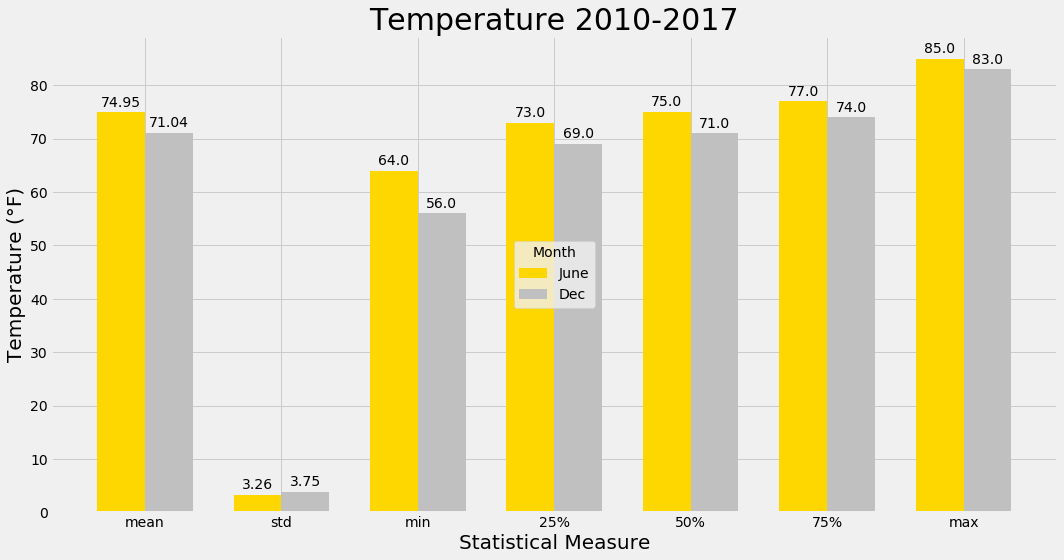

In [331]:
# Plot june vs dec temperature bar plot.
#Remove count as it is to high for the rest of the data.
labels = [ 'mean', 'std', 'min', '25%', '50%', '75%', 'max']
june_temp=[74.95, 3.26, 64.0, 73.0, 75.0, 77.0, 85.0]
dec_temp=[ 71.04, 3.75, 56.0, 69.0, 71.0, 74.0, 83.0]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots(figsize=(15,8))
rects1 = ax.bar(x - width/2, june_temp, width, label='June', color="gold")
rects2 = ax.bar(x + width/2, dec_temp, width, label='Dec', color= "silver")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Temperature (°F)', size=20)
ax.set_xlabel('Statistical Measure',size=20)
ax.set_title('Temperature 2010-2017',size=30)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc="center", title="Month")


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.savefig('Analysis/Temp_bar.png', bbox_inches='tight')
plt.show()

In [174]:
# Identify key statistics for june using describe().
# Design a query to retrieve precipitation data for june. 

def calc_prcp( start="%Y-%m-%d", end="%Y-%m-%d"):
    precp = session.query( Measurement.prcp).\
    filter(Measurement.date >=start, Measurement.date <= end).all()
    
    #convert to df
    precp_df=pd.DataFrame(precp, columns=["prcp"])
    return precp_df


precp_2010=calc_prcp('2010-06-01', '2010-06-31')
precp_2011=calc_prcp('2011-06-01', '2011-06-31')
precp_2012=calc_prcp('2012-06-01', '2012-06-31')
precp_2013=calc_prcp('2013-06-01', '2013-06-31')
precp_2014=calc_prcp('2014-06-01', '2014-06-31')
precp_2015=calc_prcp('2015-06-01', '2015-06-31')
precp_2016=calc_prcp('2016-06-01', '2016-06-31')
precp_2017=calc_prcp('2017-06-01', '2017-06-31')
# Make a list to concate the pdfs.
precp_2010to2017=[precp_2010, precp_2011, precp_2012, precp_2013, precp_2014, precp_2015, precp_2016, precp_2017]
# concate to make one stacked dataframe.
precp_june_df = pd.concat(precp_2010to2017)
#Call decribe()
precp_june_stats_df=precp_june_df.describe()
#Change name to include month for later merge with dec data.
precp_june_stats_df=precp_june_stats_df.rename(columns={"prcp":"June Prcp"})
precp_june_stats_df

,June Prcp
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


In [178]:
# Identify key statistics for December using describe().
# Design a query to retrieve precipitation data for Dec. 

def calc_prcp( start="%Y-%m-%d", end="%Y-%m-%d"):
    precp = session.query( Measurement.prcp).\
    filter(Measurement.date >=start).\
    filter(Measurement.date <= end).all()
    
    #convert to df
    precp_df=pd.DataFrame(precp, columns=["prcp"])
    return precp_df

#Call the function for 2010-2017 dec.
precp_2010=calc_prcp('2010-12-01', '2010-12-31')
precp_2011=calc_prcp('2011-12-01', '2011-12-31')
precp_2012=calc_prcp('2012-12-01', '2012-12-31')
precp_2013=calc_prcp('2013-12-01', '2013-12-31')
precp_2014=calc_prcp('2014-12-01', '2014-12-31')
precp_2015=calc_prcp('2015-12-01', '2015-12-31')
precp_2016=calc_prcp('2016-12-01', '2016-12-31')
precp_2017=calc_prcp('2017-12-01', '2017-12-31')
#Make a list of all the df and concat.
precp_2010to2017=[precp_2010, precp_2011, precp_2012, precp_2013, precp_2014, precp_2015, precp_2016, precp_2017]
precp_dec_df = pd.concat(precp_2010to2017)

#Call describe().
precp_dec_stats_df=precp_dec_df.describe()
#Rename column to include month for later merge with june data.
precp_dec_stats_df=precp_dec_stats_df.rename(columns={"prcp":"Dec Prcp"})
precp_dec_stats_df

,Dec Prcp
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000


In [253]:
#Make a list of both dfs to conacted.
stats_junedec=[precp_june_stats_df, precp_dec_stats_df]
#Concat with axis=1 for a vertical side by side join.
precp_stats_jundec_df = pd.concat(stats_junedec, axis=1)
#Display.
precp_stats_jundec_df

,June Prcp,Dec Prcp
count,1574.000000,1405.000000
mean,0.136360,0.216819
std,0.335731,0.541399
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.020000,0.030000
75%,0.120000,0.150000
max,4.430000,6.420000


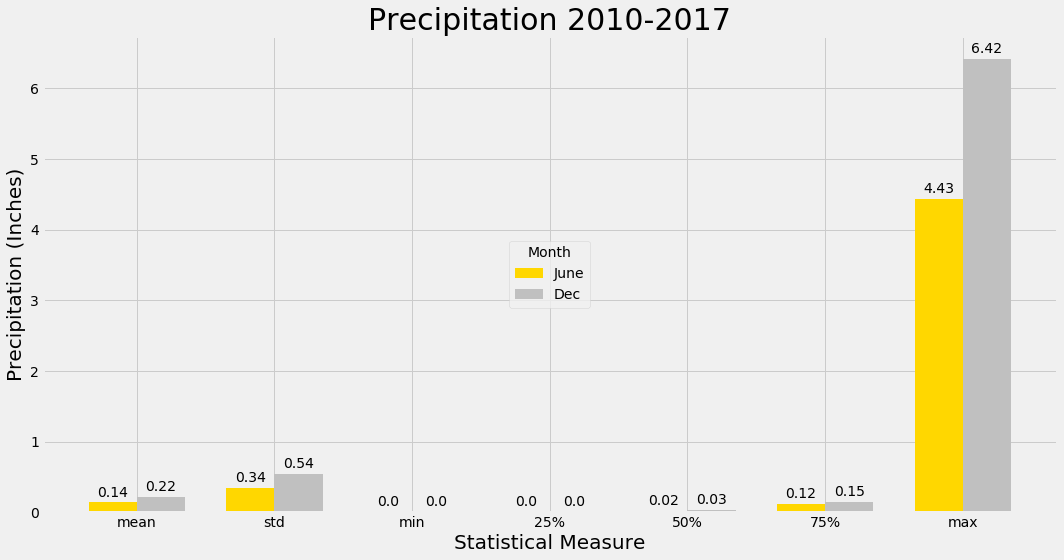

In [332]:
# Plot june vs dec precipitation bar plot.
labels = [ 'mean', 'std', 'min', '25%', '50%', '75%', 'max']
june_prcp=[0.14, 0.34, 0.0, 0.0, 0.02, 0.12, 4.43]
dec_prcp=[0.22, 0.54, 0.0, 0.0, 0.03, 0.15, 6.42]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots(figsize=(15,8))
rects1 = ax.bar(x - width/2, june_prcp, width, label='June', color="gold")
rects2 = ax.bar(x + width/2, dec_prcp, width, label='Dec', color= "silver")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Precipitation (Inches)', size=20)
ax.set_xlabel('Statistical Measure',size=20)
ax.set_title('Precipitation 2010-2017',size=30)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc="center", title="Month",mode="Expanded")


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.savefig('Analysis/Prcp_bar.png', bbox_inches='tight')
plt.show()
